In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

%matplotlib inline

In [2]:
!wget "https://courses.openedu.ru/assets/courseware/v1/24d2a7d150e00cce1ff9ed94a1690a66/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/andre-benz-inDj6_F24GQ-unsplash.jpg"

--2023-09-23 19:44:55--  https://courses.openedu.ru/assets/courseware/v1/24d2a7d150e00cce1ff9ed94a1690a66/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/andre-benz-inDj6_F24GQ-unsplash.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5393858 (5.1M) [image/jpeg]
Saving to: ‘andre-benz-inDj6_F24GQ-unsplash.jpg’

andre-benz-inDj6_F2 100%[===================>]   5.14M  5.37MB/s    in 1.0s    

2023-09-23 19:44:57 (5.37 MB/s) - ‘andre-benz-inDj6_F24GQ-unsplash.jpg’ saved [5393858/5393858]



In [3]:
img_name = "andre-benz-inDj6_F24GQ-unsplash.jpg"

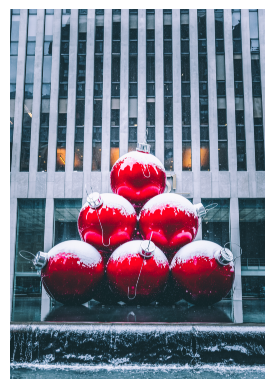

In [6]:
img = cv2.imread(img_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(RGB_img);

In [7]:
h, w, c = RGB_img.shape
new_width = 2196

k = w / h
dim = (new_width, int(new_width / k))

resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)

In [9]:
print("Coeff: ", np.round(k, 3))

Coeff:  0.688


In [10]:
print("New height: ", resized_RGB_img.shape[0])

New height:  3190


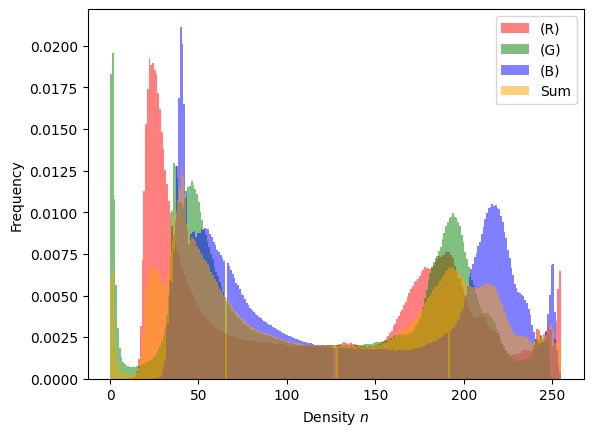

In [11]:
r_values, bin_edges, _ = plt.hist(resized_RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
g_values, bin_edges, _ = plt.hist(resized_RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
b_values, bin_edges, _ = plt.hist(resized_RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.hist(resized_RGB_img.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True)
plt.legend(['(R)', '(G)', '(B)', 'Sum'])
plt.xlabel('Density $n$')
plt.ylabel('Frequency');

In [14]:
print("Max frequency: ", np.round(np.max([np.max(r_values), np.max(g_values), np.max(b_values)]), 4))

Max frequency:  0.0212


In [15]:
img_new = resized_RGB_img.copy()

img_new[:, :, 0] = (img_new[:, :, 0] - np.min(img_new[:, :, 0])) / (np.max(img_new[:, :, 0]) - np.min(img_new[:, :, 0])) * 255
img_new[:, :, 1] = (img_new[:, :, 1] - np.min(img_new[:, :, 1])) / (np.max(img_new[:, :, 1]) - np.min(img_new[:, :, 1])) * 255
img_new[:, :, 2] = (img_new[:, :, 2] - np.min(img_new[:, :, 2])) / (np.max(img_new[:, :, 2]) - np.min(img_new[:, :, 2])) * 255

In [16]:
img_new[1568][1096]

array([210,  29,  48], dtype=uint8)

In [18]:
wavelet = 'haar'
c = pywt.dwt2(img_new, wavelet)
cA, (cH, cV, cD) = c

In [19]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)

In [21]:
threshold = 100
cA1[np.abs(cA1) < threshold] = 0

cA1[cA1 == 0].shape

(0,)